In [1]:
import pandas as pd
df=pd.read_csv('MSFT.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060163,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062311,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063386,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061774,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060700,47894400
...,...,...,...,...,...,...,...
9588,2024-04-01,423.950012,427.890015,422.220001,424.570007,424.570007,16316000
9589,2024-04-02,420.109985,422.380005,417.839996,421.440002,421.440002,17912000
9590,2024-04-03,419.730011,423.260010,419.089996,420.450012,420.450012,16475600
9591,2024-04-04,424.989990,428.670013,417.570007,417.880005,417.880005,19370900


In [2]:
df=df[['Date','Close']]
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9588,2024-04-01,424.570007
9589,2024-04-02,421.440002
9590,2024-04-03,420.450012
9591,2024-04-04,417.880005


In [3]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9588    2024-04-01
9589    2024-04-02
9590    2024-04-03
9591    2024-04-04
9592    2024-04-05
Name: Date, Length: 9593, dtype: object

In [4]:
import datetime
def str_to_datetime(s):
  split=s.split('-')
  year,month,day=int(split[0]),int(split[1]),int(split[2])
  return datetime.datetime(year=year,month=month,day=day)
datetime_object=str_to_datetime('1986-03-19')

df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9588,2024-04-01,424.570007
9589,2024-04-02,421.440002
9590,2024-04-03,420.450012
9591,2024-04-04,417.880005


In [5]:
df['Date']=df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-5-a4c74efbab4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9588   2024-04-01
9589   2024-04-02
9590   2024-04-03
9591   2024-04-04
9592   2024-04-05
Name: Date, Length: 9593, dtype: datetime64[ns]

In [6]:
df.index=df.pop('Date')
df


,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2024-04-01,424.570007
2024-04-02,421.440002
2024-04-03,420.450012


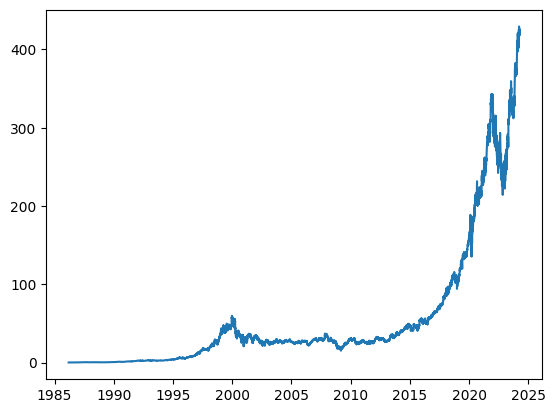

In [7]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [8]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2024-04-05',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
758,2024-04-01,421.649994,421.429993,420.720001,424.570007
759,2024-04-02,421.429993,420.720001,424.570007,421.440002
760,2024-04-03,420.720001,424.570007,421.440002,420.450012
761,2024-04-04,424.570007,421.440002,420.450012,417.880005


In [9]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((763,), (763, 3, 1), (763,))

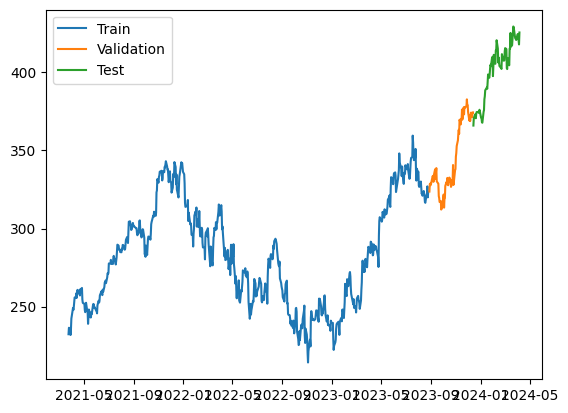

In [10]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)

Epoch 1/50
20/20 [==============================] - 4s 37ms/step - loss: 80757.9453 - mean_absolute_error: 282.2489 - val_loss: 118511.8984 - val_mean_absolute_error: 343.5493
Epoch 2/50
20/20 [==============================] - 0s 7ms/step - loss: 80339.0781 - mean_absolute_error: 281.5069 - val_loss: 117867.8047 - val_mean_absolute_error: 342.6107
Epoch 3/50
20/20 [==============================] - 0s 6ms/step - loss: 79611.4766 - mean_absolute_error: 280.2037 - val_loss: 116451.7891 - val_mean_absolute_error: 340.5379
Epoch 4/50
20/20 [==============================] - 0s 7ms/step - loss: 77923.7891 - mean_absolute_error: 277.1766 - val_loss: 113466.9062 - val_mean_absolute_error: 336.1257
Epoch 5/50
20/20 [==============================] - 0s 6ms/step - loss: 74562.9922 - mean_absolute_error: 271.0594 - val_loss: 107915.7734 - val_mean_absolute_error: 327.7644
Epoch 6/50
20/20 [==============================] - 0s 6ms/step - loss: 68868.3906 - mean_absolute_error: 260.2869 - val_los

20/20 [==============================] - 1s 2ms/step


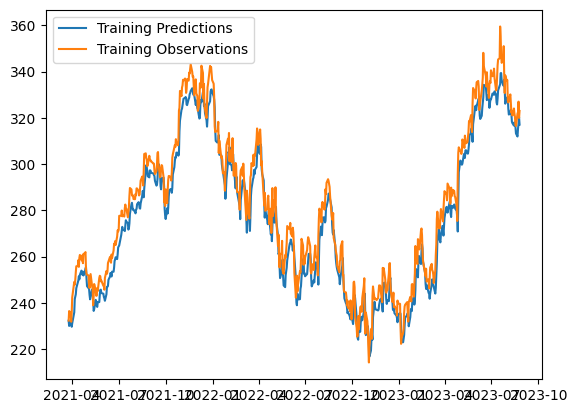

In [17]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

3/3 [==============================] - 0s 4ms/step


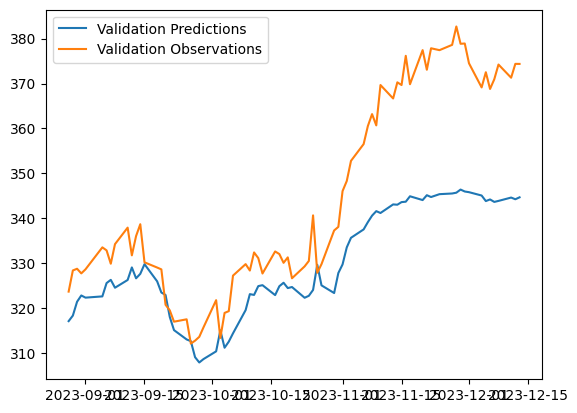

In [18]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

3/3 [==============================] - 0s 6ms/step


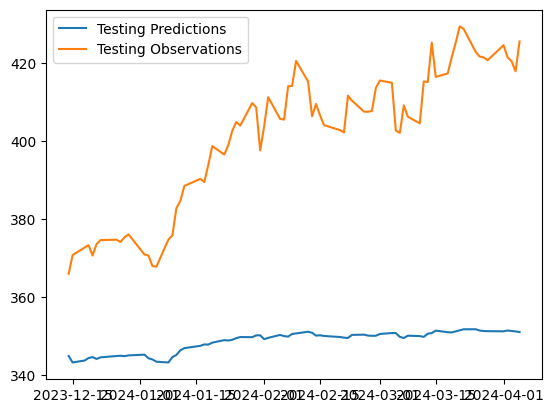

In [19]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

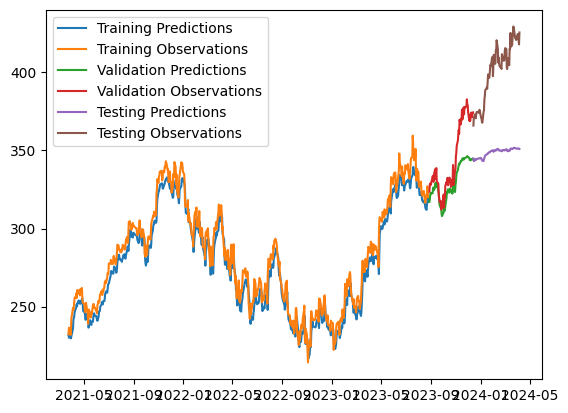

In [20]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])